# Logistic Regression

## 1.1 What is the problem?
>"Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision." 

<br />
- From "Programming Exercise 2: Logistic Regression" 

In [1]:
#important library
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
from scipy import optimize

In [2]:
# Load ex1data1.txt
x_1,x_2,y=np.loadtxt('ex2data1.txt',dtype= float,delimiter=',',skiprows=0,unpack=True)

## 1.1 Let's see data:
This is the one of most important part of the game. Before starting, it is always good if we can visualize data.

In [3]:
positive_response=[i for i in range (0,len(y),1) if y[i]==1]
negative_response=[i for i in range (0,len(y),1) if y[i]==0]

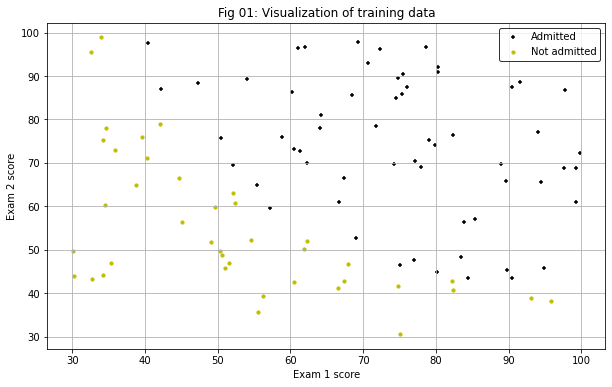

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(x_1[positive_response],x_2[positive_response],label='Admitted',color='k', marker='+',s=20)
plt.scatter(x_1[negative_response],x_2[negative_response],label='Not admitted',color='y', marker='o',s=10)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Fig 01: Visualization of training data')
plt.legend(edgecolor='black')
plt.grid(True)

## 1.2 Gradient Descent
### 1.2.1 Warmup Exercise
Logistic regression hypothesis: <br />
$\begin{equation}h_{\theta}(x)= g(\theta^{T}x)\tag{1}\end{equation}$
Where $g(z)=\frac{1}{1+e^{-z}}$. This is called *Sigmoid function*. <br />
Let's see Sigmoid function: 

Text(-4.8, 0.9, 'See value of the function at x=0 is 0.5')

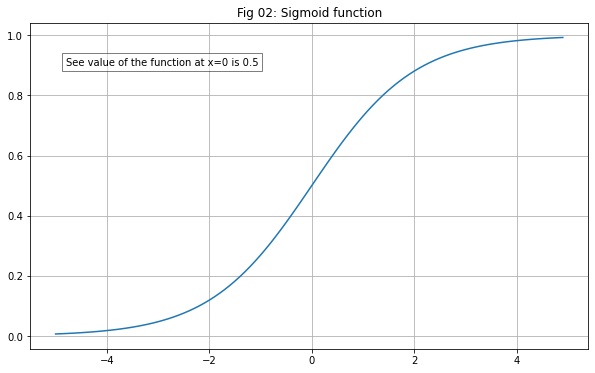

In [5]:
plt.figure(figsize=(10,6))
x=np.arange(-5,5,0.1)
plt.plot(x,expit(x))           # expit is vectorized Sigmoid function: 
plt.title('Fig 02: Sigmoid function')
plt.grid(True)
plt.text(-4.8,0.9,'See value of the function at x=0 is 0.5', bbox=dict(facecolor='white', alpha=0.5))

### 1.2.2 Matrix form of cost function
Before doing anything more, I have to make X, Y and $\theta$ matrix. Let's do. <br />
 
Order of our matrices are: 
- X $\longrightarrow (n+1) \times m$
- Y $\longrightarrow 1 \times m$
- $\Theta \longrightarrow (n+1) \times 1$

<br />
where  n is number of features and m is number of training examples. <br />

Now cost function is:
$\begin{equation}J(\theta)=\frac{1}{m}[Ylog(g(\theta^{T}x)^{T}-(\mathbb{1}-Y)log(\mathbb{1}-g(\theta^{T}x)^{T}]\tag{2}\end{equation}$

**DISCLAIMER:** _$\mathbb{1}$ is not an identity matrix but a column matrix of 1._

In [6]:
#This is the control box
x_matrix=np.matrix([np.ones(len(x_1)),x_1,x_2]) # matrix of order (n+1)*m where n is number of fetures
y_matrix=np.matrix(y)            #matrix of order 1*m
initial_theta_matrix=np.matrix(np.zeros(x_matrix.shape[0])).T   # matrix of order (n+1)*1
m=len(y)     # Number of total training example
identity_matrix=np.matrix(np.ones(len(x_1)))

#For gradient descent
alpha=0.001
iterations=10**4

In [7]:
def logistic_cost(Theta,X,Y,identity,total_training_example):
    sigmoid=expit(np.dot(Theta.T,X))
    cost_1=np.dot(Y,np.log(sigmoid).T)
    cost_2=np.dot((identity-Y),np.log(identity-sigmoid).T)
    cost=(-cost_1-cost_2)/(total_training_example)
    return cost

In [8]:
# just checking whether logistic_cost function is working:
cost=logistic_cost(initial_theta_matrix,x_matrix,y_matrix,identity_matrix,m)
print(cost)

[[0.69314718]]


#### **Matrix form of gradient descent function:**
Logistic gradient descent function form is looks exactly same with Linear gradient descent function. Here, <br />
$\begin{equation}\nabla J(\theta)=\frac{\alpha}{m}X[(g(\theta^{T}X)-Y]^{T}\tag{3}\end{equation}$ where $\alpha$ is learning rate. <br />
So, we will update $\theta$ in this way: 
$\begin{equation}\theta:=\theta-\nabla J(\theta)\tag{4}\end{equation}$

In [9]:
def gradient_descent(X,Y,Theta,identity,learning_rate,iteration,total_training_example):
    cost_array=np.zeros(iteration)
    for i in range(0,iteration,1):
        sigmoid=expit(np.dot(Theta.T,X))
        difference=sigmoid-Y
        factor=learning_rate/total_training_example             
        Theta=Theta-factor*np.matmul(X,difference.T)    
        cost_array[i]=logistic_cost(Theta,X,Y,identity,total_training_example)     # we will plot it to show that it converges with iteration
    return cost_array,Theta  

In [10]:
cost,theta_final=gradient_descent(x_matrix,y_matrix,initial_theta_matrix,identity_matrix,alpha,iterations,m)

In [11]:
print(cost)

[0.69829069 0.65971176 0.66162727 ... 0.58503571 0.5850316  0.5850275 ]


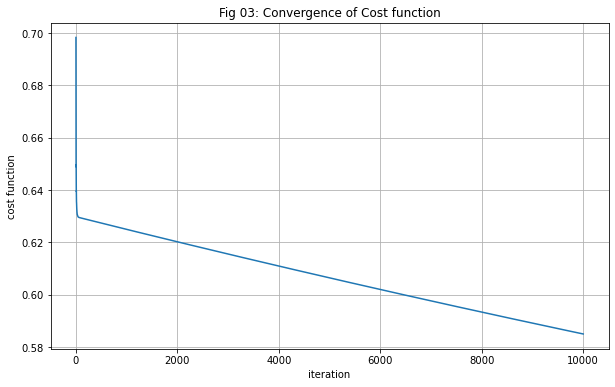

In [12]:
# plot convergence of cost function
plt.figure(figsize=(10,6))
plt.plot(np.arange(0,iterations,1),cost)
plt.xlabel('iteration')
plt.ylabel('cost function')
plt.title('Fig 03: Convergence of Cost function')
plt.grid(True)
plt.show()

See, even after 10,0000 iterations, we have not reached minima. Anyway, we can use an optimize function from scipy named 'fmin'. Please have a look in this article: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html. <br />

**Using Scipy Library Optimization function:**

In [13]:
final_theta=optimize.fmin(logistic_cost,initial_theta_matrix,args=(x_matrix,y_matrix,identity_matrix,m),xtol=0.00001,ftol=0.00001,full_output=0)
print('theta parameters=',final_theta)  # At last, we have found optimum parameters
print('cost=',logistic_cost(final_theta,x_matrix,y_matrix,identity_matrix,m))

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 170
         Function evaluations: 312
theta parameters= [-25.16133222   0.20623171   0.20147158]
cost= [[0.2034977]]


## 1.3 Decision Boundary
Decision boundary equation:
$\begin{equation}\theta^{T}X=0\tag{5}\end{equation}$ 
So particularly, for this problem:
$\begin{equation}x_{2}=-\frac{1}{\theta_{2}}(\theta_{0}+\theta_{1}x_{1})\tag{6}\end{equation}$ 

In [14]:
x_2_decision=(-1/final_theta[2])*(final_theta[0]+final_theta[1]*x_1)

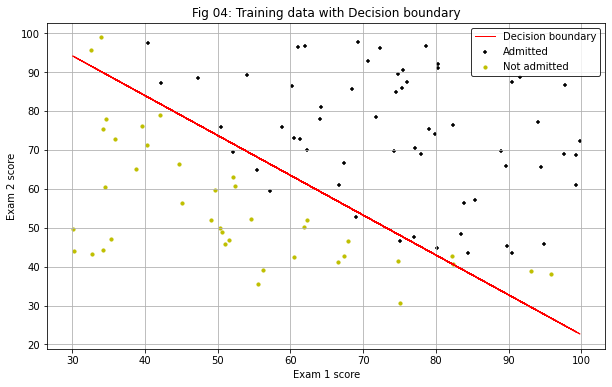

In [15]:
plt.figure(figsize=(10,6))
plt.plot(x_1,x_2_decision, color='r',linewidth=1, label='Decision boundary')
plt.scatter(x_1[positive_response],x_2[positive_response],label='Admitted',color='k', marker='+',s=20)
plt.scatter(x_1[negative_response],x_2[negative_response],label='Not admitted',color='y', marker='o',s=10)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Fig 04: Training data with Decision boundary')
plt.legend(edgecolor='black')
plt.grid(True)

**Predict probability of Admission:**

In [16]:
exam_1_score=float(input("Enter the score of exam 01: "))
exam_2_score=float(input("Enter the score of exam 02: "))

Enter the score of exam 01:  45
Enter the score of exam 02:  85


In [17]:
# Heyy!!! Know your future
prediction_machine=np.array([1.0,exam_1_score,exam_2_score])
result=expit(sum(prediction_machine*final_theta))
print('So your chance is: ',result)  # Probability of admission

So your chance is:  0.7762906830739157


# Regularized Logistic Regression


## 2.1 What is the problem?
>"Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model." 

<br />
From "Programming Exercise 2: Logistic Regression" . <br />
Let's load data.

In [18]:
# Load ex2data2.txt
x_1,x_2,y=np.loadtxt('ex2data2.txt',dtype= float,delimiter=',',skiprows=0,unpack=True)

## 2.1 Let's see data:

In [19]:
positive_response=[i for i in range (0,len(y),1) if y[i]==1]
negative_response=[i for i in range (0,len(y),1) if y[i]==0]

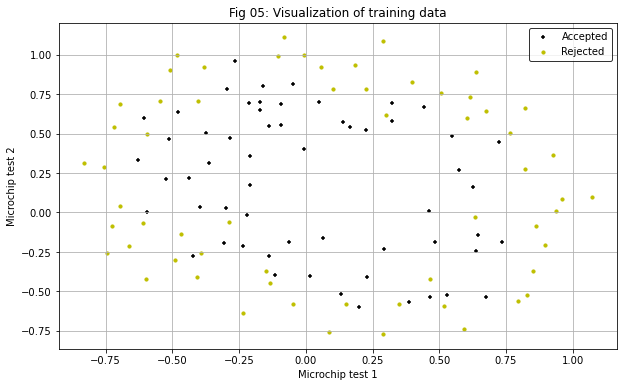

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(x_1[positive_response],x_2[positive_response],label='Accepted',color='k', marker='+',s=20)
plt.scatter(x_1[negative_response],x_2[negative_response],label='Rejected',color='y', marker='o',s=10)
plt.xlabel('Microchip test 1')
plt.ylabel('Microchip test 2')
plt.title('Fig 05: Visualization of training data')
plt.legend(edgecolor='black')
plt.grid(True)

## 2.2 Feature Maping
>"One way to fit the data better is to create more features from each data point. ...we will map the features into all polynomial terms of x1 and x2 up to the sixth power."

<br />
From "Programming Exercise 2: Logistic Regression" . <br />

In [21]:
def feature_mapping(feature_1,feature_2,power):
    feature_matrix=np.ones(len(feature_1))
    for i in range (0,power+1,1):
        for j in range (0,power+1,1):
            if i+j<=power and i+j>0:
                z=(feature_1**i)*(feature_2**j)
                feature_matrix=np.vstack((feature_matrix,z))
    return feature_matrix    

## 2.3 Regularized Gradient Descent 
### 2.3.1 Matrix form of Cost function
You know the regularized logistic cost function from the exercise (See 2.3). But we can make a form of that equation also. That $ \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$ ($\lambda$ is regularization parameter) can be written as $\theta^{T}\Lambda\theta$ where  <br />
 
$\begin{equation}\Lambda = \begin{bmatrix} 
    0 &  \\
    & \lambda  \\ 
    & &\ddots & \\
    &    &    & \lambda 
    \end{bmatrix}_{(n+1)\times(n+1)}\tag{7} \end{equation}$  

<br />
  

Now cost function is:
$\begin{equation}J(\theta)=\frac{1}{m}[Ylog(g(\theta^{T}x))^{T}-(\mathbb{1}-Y)log(\mathbb{1}-g(\theta^{T}x))^{T}]+\theta^{T}\Lambda\theta^{T}\tag{8}\end{equation}$

In [22]:
#control room
x_matrix=feature_mapping(x_1,x_2,6)            # this matrix is order of (n+1)*m
y_matrix=np.matrix(y)        #matrix order: 1*m
initial_theta_matrix=np.matrix(np.zeros(x_matrix.shape[0])).T    #matrix order: (n+1)*1
identity_matrix=np.matrix(np.ones(len(x_1)))   #this name is a little bit misleading. It's just an matrix with all element 1
training_example=len(x_1)
regularization_parameter=1.0 

##Now we need Lambda matrix
lambda_matrix=np.zeros((x_matrix.shape[0],x_matrix.shape[0]))   # (n+1)*(n+1) order matrix
for i in range (0,x_matrix.shape[0],1):
    for j in range (0,x_matrix.shape[0],1):
        if i==j and i!=0:
            lambda_matrix[i][j]=regularization_parameter

## some gradien descent constraints
alpha=3.0
iterations=10**5

In [23]:
# see the name and you will understand what this is
def regularized_logistic_cost(Theta,X,Y,identity,total_training_example,Lambda):
    sigmoid=expit(np.dot(Theta.T,X))
    cost_1=np.dot(Y,np.log(sigmoid).T)
    cost_2=np.dot((identity-Y),np.log(identity-sigmoid).T)
    additional_part=np.matmul(Theta.T,np.matmul(Lambda,Theta))
    cost=(-cost_1-cost_2)/(total_training_example)+additional_part/(2*total_training_example)
    return cost

In [24]:
#checking again
cost=regularized_logistic_cost(initial_theta_matrix,x_matrix,y_matrix,identity_matrix,training_example,lambda_matrix)

### 2.3.2 Matrix form of Gradient descent

Regularized Logistic gradient descent function form is looks exactly same with Logistic gradient descent function with an addition. That is, <br />
$\begin{equation}\nabla J(\theta)=\frac{\alpha}{m}X[(g(\theta^{T}X)-Y]^{T}+\frac{1}{m}\Lambda\theta\tag{9}\end{equation}$

So, we will update $\theta$ in this way: 
$\begin{equation}\theta:=\theta-\nabla J(\theta)\tag{10}\end{equation}$


In [25]:
def regularized_gradient_descent(X,Y,Theta,identity,learning_rate,iteration,total_training_example,Lambda):
    cost_array=np.zeros(iteration)
    for i in range(0,iteration,1):
        sigmoid=expit(np.dot(Theta.T,X))
        difference=sigmoid-Y
        factor=learning_rate/total_training_example             
        Theta=Theta-factor*np.matmul(X,difference.T)-np.matmul(Lambda,Theta)/total_training_example    
        cost_array[i]=regularized_logistic_cost(Theta,X,Y,identity,total_training_example,Lambda)     # we will plot it to show that it converges with iteration
    return cost_array,Theta  

In [26]:
cost_box_regularized,final_theta=regularized_gradient_descent(x_matrix,y_matrix,initial_theta_matrix,identity_matrix,alpha,iterations,training_example,lambda_matrix)

In [27]:
print(cost_box_regularized[-1])

0.5794413913433383


### 2.3.3 A comparision between Logistic and Regularized Logistic Regression
We have done so many work. So question is: Is it worthy of that? Let's find out. We will plot convergence of cost function in both method and with same initial constants. <br >

Here calculate logistic cost for ex2data2 set.

In [28]:
cost_box_logistic,final_theta_logistic=gradient_descent(x_matrix,y_matrix,initial_theta_matrix,identity_matrix,alpha,iterations,training_example)

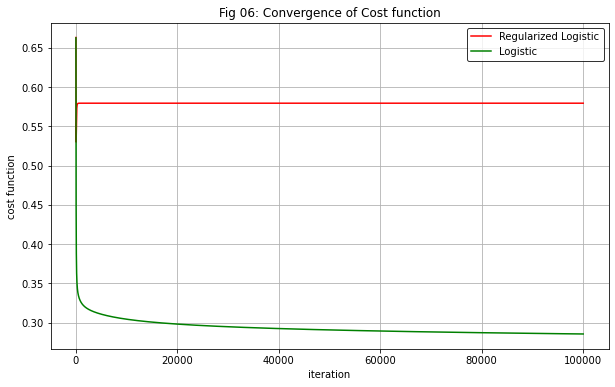

In [29]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(0,iterations,1),cost_box_regularized,label='Regularized Logistic',color='r')
plt.plot(np.arange(0,iterations,1),cost_box_logistic,label='Logistic',color='g')
plt.xlabel('iteration')
plt.ylabel('cost function')
plt.title('Fig 06: Convergence of Cost function')
plt.grid(True)
plt.legend(edgecolor='black')

So, if your initial guess and cost (realted to initial guess) is very close, then you will have a problem to set a learning parameter in case of logistic regression. In that case, learning parameter should be very low. So, it might be a trial and error game. But Regularized logistic is doing quite well in this case. <br />

**It's a win then!! :)**

<u>One more conclusion:</u>  In previous exercise (ex1), I had a doubt why we have to plot decision boundary (I know, it is a good way of visualization; but I am talking about decision making). From figure 06, we can understand that for shortcoming of our modeling, sometimes cost function might converge to a wrong value also.

### 2.3.4 Decision Boundary

In [30]:
u = np.linspace(-1.0, 1.0,100)
v = np.linspace(-1.0, 1.0, 100)
z = np.zeros((len(u), len(v)))
 
for i,ui in enumerate(u): # Enumerate takes values from the array as well as creates index for the values. Here i stands for the index which we will use to populate the z matrix
    for j,vj in enumerate(v):
        z[i,j] = np.dot(final_theta.T,feature_mapping(np.array([ui]),np.array([vj]),6))
 
X,Y=np.meshgrid(u,v) # Creates a mesh of the values of u and v. Basically it creates matrices X and Y of same shape as z by using the same type of loop as you have used for calculating the value of z. You don't need to use this step but it is generally good practice to create a mesh grid.

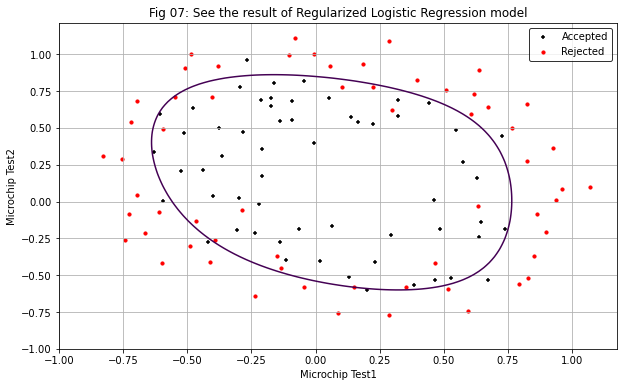

In [31]:
plt.figure(figsize=(10,6))
plt.contour(X,Y,z.transpose(),levels=[0])   #levels=[0] confirmes that we plotting for (theta.T)X=0
plt.scatter(x_1[positive_response],x_2[positive_response],label='Accepted',color='k', marker='+',s=20)
plt.scatter(x_1[negative_response],x_2[negative_response],label='Rejected',color='r', marker='o',s=10)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.title('Fig 07: See the result of Regularized Logistic Regression model')
plt.legend()
plt.grid(True)
plt.legend(edgecolor='black')

Second one is done also.<br />
I am really excited because in next assignment we will build **a model to recognise hand-written digits!!!**
So tighten your belt. See you.